<h1><strong>Capstone Project</strong></h1>
<h2><strong>What Consumer Businesses Are Established Around Financial Centers &ndash; Hong Kong, Toronto and New York</strong></h2>

<h2>1. Introduction</h2>
<h3>1.1 Background</h3>
<p>There is no exception that the cost of real estate around financial centers are among the highest in all countries around the world, yet offer good opportunities for operating consumer businesses with high profitability potential because those employed in the financial sector are among the highest paid professionals who can afford luxury and are willing to spend. Therefore, quite a lot of entrepreneurs are very interested in setting up and running consumer businesses in these high cost yet high profitability areas.</p>
<p>The following study attempts to use advanced data analytics techniques to conduct a research for types of consumer businesses already established in three top-tier financial centers:</p>
<ul>
<li>Hong Kong, which is where I come from</li>
<li>Toronto, which is where I live now</li>
<li>New York, which is the number one financial center for making reference to</li>
</ul>

<h3>1.2 Problem</h3>
<p>Due to high real estate cost, the rental expense is usually the most critical operating expense for operating a consumer business in financial center areas. If an entrepreneur chooses a type of business not sufficiently popular nor profitable then the chance for survival would become very slim. Therefore, the only chance for an entrepreneur to be successful is to pick a right kind of business to get into.</p>

<h3>1.3 Interest</h3>
<p>Due to the reasons explained above, understanding what kinds of businesses are well established and have high level of popularity in other financial centers around the world would be very good reference for an entrepreneur to decide the kind of business he could set up in order to get highest chance of survival and prosper in long term.</p>
<p>For example, an entrepreneur in Hong Kong can research what kinds of consumer businesses are popular in New York and Toronto and decide if such businesses could be adopted in Hong Kong even the culture could be somewhat different.</p>

<h2>2. Data acquisition</h2>
<h3>2.1 Data sources</h3>
<p>The data required for conducting geographical and venue study for New York is available per guidance and instructions in the Week 3 Course Lab, and those for Toronto is available per guidance in the Week 3 Assignment.</p>
<p>The geographical data for Hong Kong is available from the following:</p>
<ul>
<li><a href="https://en.wikipedia.org/wiki/Districts_of_Hong_Kong">https://en.wikipedia.org/wiki/Districts_of_Hong_Kong</a></li>
<li><a href="https://tools.wmflabs.org/geohack/geohack.php?pagename=Central_and_Western_District&amp;params=22.28666_N_114.15497_E_type:adm2nd_region:HK">https://tools.wmflabs.org/geohack/geohack.php?pagename=Central_and_Western_District&amp;params=22.28666_N_114.15497_E_type:adm2nd_region:HK</a></li>
</ul>
<p>More in-depth division of geographical neighborhoods around the financial center district in Hong Kong is available from the following:</p>
<ul>
<li><a href="https://www.eac.hk/en/distco/2019dc_elect_map.htm">https://www.eac.hk/en/distco/2019dc_elect_map.htm</a> (Electoral Affairs Commission of Hong Kong)</li>
</ul>
<p>All venue data will be acquired from Foursquare.</p>

<h2>3. Methodology</h2>
<p>In this study, we use Foursquare APIs to retrieve the top 100 venues within 500 meters of the three global financial centers &ndash; Hong Kong, Toronto and New York, centered around their geo coordinates &ndash; the Central District in Hong Kong, Downtown TD Centre in Toronto and Wall Street in New York, which are found from online data sources such as Google map, Wikipedia &amp; the geo link, and the respective government web sites.</p>
<p>These business venues are categorized according to their business type, for example, restaurants, caf&eacute;, etc. and are the tabulated into tables sorted by popularity of business types &ndash; number of business venues established within the financial center districts.</p>
<p>From the tabulated business venues, we can compare the popularity of certain business types among these financial centers to make cross reference among them.</p>
<p>This is a very direct and simple approach for achieving our objective, and we believe that more advanced analytic approaches such as machine learning are not needed for studying this particular problem but only introduce unnecessary efforts and complication.</p>

In [56]:
# Import basic libraries

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [57]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [58]:
# Install Folium module
#!conda install -c conda-forge folium=0.5.0 --yes

In [59]:
# Install Geocoder module
#!conda install -c conda-forge geopy --yes

In [60]:
# Import all remaining libraries

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

#import k-means from clustering stage
#from sklearn.cluster import KMeans

#import folium # map rendering library

#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

print('Libraries imported.')

Libraries imported.


<p>HK financial center district and geo data from these online data sources:</p>
<ul>
<li><a href="https://en.wikipedia.org/wiki/Districts_of_Hong_Kong">https://en.wikipedia.org/wiki/Districts_of_Hong_Kong</a></li>
<li><a href="https://tools.wmflabs.org/geohack/geohack.php?">https://tools.wmflabs.org/geohack/geohack.php?</a>pagename=Central_and_Western_District&amp;params=22.28666_N_114.15497_E_type:adm2nd_region:HK</li>
</ul>

<table width="513">
<tbody>
<tr>
<td width="129">District</td>
<td width="64">Population&yuml;[6]</td>
<td width="64">Area</td>
<td width="64">Density</td>
<td width="64">Region</td>
<td width="64">Latitude</td>
<td width="64">Longitude</td>
</tr>
<tr>
<td>Central and Western</td>
<td>244,600</td>
<td>12.44</td>
<td>19,983.92</td>
<td>Hong Kong Island</td>
<td>22.28666</td>
<td>114.155</td>
</tr>
<tr>
<td>Eastern</td>
<td>574,500</td>
<td>18.56</td>
<td>31,217.67</td>
<td>Hong Kong Island</td>
<td>22.28411</td>
<td>114.2241</td>
</tr>
<tr>
<td>Southern</td>
<td>269,200</td>
<td>38.85</td>
<td>6,962.68</td>
<td>Hong Kong Island</td>
<td>22.24725</td>
<td>114.1588</td>
</tr>
<tr>
<td>Wan Chai</td>
<td>150,900</td>
<td>9.83</td>
<td>15,300.10</td>
<td>Hong Kong Island</td>
<td>22.27968</td>
<td>114.1717</td>
</tr>
<tr>
<td>Sham Shui Po</td>
<td>390,600</td>
<td>9.35</td>
<td>41,529.41</td>
<td>Kowloon</td>
<td>22.33074</td>
<td>114.1622</td>
</tr>
<tr>
<td>Kowloon City</td>
<td>405,400</td>
<td>10.02</td>
<td>40,194.70</td>
<td>Kowloon</td>
<td>22.3282</td>
<td>114.1916</td>
</tr>
<tr>
<td>Kwun Tong</td>
<td>641,100</td>
<td>11.27</td>
<td>56,779.05</td>
<td>Kowloon</td>
<td>22.31326</td>
<td>114.2258</td>
</tr>
<tr>
<td>Wong Tai Sin</td>
<td>426,200</td>
<td>9.3</td>
<td>45,645.16</td>
<td>Kowloon</td>
<td>22.33353</td>
<td>114.1969</td>
</tr>
<tr>
<td>Yau Tsim Mong</td>
<td>318,100</td>
<td>6.99</td>
<td>44,864.09</td>
<td>Kowloon</td>
<td>22.32138</td>
<td>114.1726</td>
</tr>
<tr>
<td>Islands</td>
<td>146,900</td>
<td>175.12</td>
<td>825.14</td>
<td>New Territories</td>
<td>22.26114</td>
<td>113.9461</td>
</tr>
<tr>
<td>Kwai Tsing</td>
<td>507,100</td>
<td>23.34</td>
<td>21,503.86</td>
<td>New Territories</td>
<td>22.35488</td>
<td>114.084</td>
</tr>
<tr>
<td>North</td>
<td>310,800</td>
<td>136.61</td>
<td>2,220.19</td>
<td>New Territories</td>
<td>22.49471</td>
<td>114.1381</td>
</tr>
<tr>
<td>Sai Kung</td>
<td>448,600</td>
<td>129.65</td>
<td>3,460.08</td>
<td>New Territories</td>
<td>22.38143</td>
<td>114.2705</td>
</tr>
<tr>
<td>Sha Tin</td>
<td>648,200</td>
<td>68.71</td>
<td>9,433.85</td>
<td>New Territories</td>
<td>22.38715</td>
<td>114.1953</td>
</tr>
<tr>
<td>Tai Po</td>
<td>307,100</td>
<td>136.15</td>
<td>2,220.35</td>
<td>New Territories</td>
<td>22.45085</td>
<td>114.1642</td>
</tr>
<tr>
<td>Tsuen Wan</td>
<td>303,600</td>
<td>61.71</td>
<td>4,887.38</td>
<td>New Territories</td>
<td>22.36281</td>
<td>114.1291</td>
</tr>
<tr>
<td>Tuen Mun</td>
<td>495,900</td>
<td>82.89</td>
<td>5,889.38</td>
<td>New Territories</td>
<td>22.39211</td>
<td>113.9701</td>
</tr>
<tr>
<td>Yuen Long</td>
<td>607,200</td>
<td>138.46</td>
<td>4,297.99</td>
<td>New Territories</td>
<td>22.44559</td>
<td>114.0222</td>
</tr>
</tbody>
</table>

In [61]:
# Create HK financial center, the 'Central and Western'district, geo dataframe:

data = [['Central and Western','Central and Western',22.28666,114.15497]]
  
# Create the pandas DataFrame 
HK_data = pd.DataFrame(data, columns = ['Borough', 'Neighborhood','Latitude','Longitude']) 
HK_data

,Borough,Neighborhood,Latitude,Longitude
0,Central and Western,Central and Western,22.28666,114.15497


In [62]:
# Define Foursquare Credentials and Version

CLIENT_ID = '4FQ1KRUGU3VCZNG0WAAXO3LRVGKS3MHGNKT0U24GCA1V4G05' # your Foursquare ID
CLIENT_SECRET = 'KY13LZJKU4KB0UPKMA20A4YFQXDSIQV2BYH5EBSKAAS05BX0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4FQ1KRUGU3VCZNG0WAAXO3LRVGKS3MHGNKT0U24GCA1V4G05
CLIENT_SECRET:KY13LZJKU4KB0UPKMA20A4YFQXDSIQV2BYH5EBSKAAS05BX0


In [63]:
# Explore the HK financial district

HK_data.loc[0, 'Neighborhood']

'Central and Western'

In [64]:
# Get the neighborhood's latitude and longitude values

neighborhood_latitude = HK_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = HK_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = HK_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Central and Western are 22.28666, 114.15497.


In [65]:
# Get the top 100 venues that are in HK financial district within a radius of 500 meters

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=4FQ1KRUGU3VCZNG0WAAXO3LRVGKS3MHGNKT0U24GCA1V4G05&client_secret=KY13LZJKU4KB0UPKMA20A4YFQXDSIQV2BYH5EBSKAAS05BX0&v=20180605&ll=22.28666,114.15497&radius=500&limit=100'

In [66]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5debdf79f7706a001bd51251'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Central District',
  'headerFullLocation': 'Central District, Hong Kong',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 156,
  'suggestedBounds': {'ne': {'lat': 22.291160004500007,
    'lng': 114.15982422239978},
   'sw': {'lat': 22.282159995499995, 'lng': 114.15011577760023}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b0588ccf964a52080da22e3',
       'name': 'Four Seasons Hotel Hong Kong (香港四季酒店)',
       'location': {'address': '8 Finance St',
        'lat': 22.28655423619619,
        'lng': 114.15692916188699,
        'labeledLatLngs': [{'lab

In [67]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [68]:
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

HK_nearby_venues = nearby_venues
HK_nearby_venues.head()

,name,categories,lat,lng
0,Four Seasons Hotel Hong Kong (香港四季酒店),Hotel,22.286554,114.156929
1,Central Indian Restaurant,Indian Restaurant,22.285622,114.153839
2,Galerie Perrotin,Art Gallery,22.285455,114.156215
3,The Spa at Four Seasons,Spa,22.286279,114.157623
4,Blue Bar,Hotel Bar,22.286817,114.157464


In [69]:
print('{} venues were returned by Foursquare in HK financial center district.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare in HK financial center district.


<p>Toronto financial district is located in Toronto downtown. From the data source provided in Week 3 Assignment, the detailed data are as follows:</p>
<ul>
<li>Postcode: M5K</li>
<li>Borough: Downtown</li>
<li>Neighborhood: Toronto Dominion Centre</li>
<li>Latitude:&nbsp;43.6471768</li>
<li>Longitude:&nbsp;-79.3815764</li>
</ul>
<p>&nbsp;</p>

In [70]:
# Create Toronto financial center, the 'Downtown Toronto Dominion Centre'district, geo dataframe:

data = [['Downtown','Toronto Dominion Centre',43.6471768,-79.3815764]]
  
# Create the pandas DataFrame 
Toronto_data = pd.DataFrame(data, columns = ['Borough', 'Neighborhood','Latitude','Longitude']) 
Toronto_data

,Borough,Neighborhood,Latitude,Longitude
0,Downtown,Toronto Dominion Centre,43.647177,-79.381576


In [71]:
# Explore the Toronto financial district

Toronto_data.loc[0, 'Neighborhood']

'Toronto Dominion Centre'

In [72]:
# Get the neighborhood's latitude and longitude values

neighborhood_latitude = Toronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Toronto_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Toronto_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Toronto Dominion Centre are 43.6471768, -79.3815764.


In [73]:
# Get the top 100 venues that are in Toronto financial district within a radius of 500 meters

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=4FQ1KRUGU3VCZNG0WAAXO3LRVGKS3MHGNKT0U24GCA1V4G05&client_secret=KY13LZJKU4KB0UPKMA20A4YFQXDSIQV2BYH5EBSKAAS05BX0&v=20180605&ll=43.6471768,-79.3815764&radius=500&limit=100'

In [74]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5debdf440f5968001bec91db'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Financial District',
  'headerFullLocation': 'Financial District, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 147,
  'suggestedBounds': {'ne': {'lat': 43.6516768045, 'lng': -79.37536913223865},
   'sw': {'lat': 43.642676795499995, 'lng': -79.38778366776135}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ad4c05df964a52059f620e3',
       'name': 'Canoe',
       'location': {'address': '66 Wellington St West',
        'crossStreet': 'at Bay Street',
        'lat': 43.647452066183476,
        'lng': -79.38132001815676,
        'labeledLatLn

In [75]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [76]:
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

Toronto_nearby_venues = nearby_venues
Toronto_nearby_venues.head()

,name,categories,lat,lng
0,Canoe,Restaurant,43.647452,-79.381320
1,Equinox Bay Street,Gym,43.648100,-79.379989
2,Walrus Pub & Beer Hall,Pub,43.647375,-79.379515
3,The Fairmont Royal York,Hotel,43.645449,-79.381508
4,Pilot Coffee Roasters,Coffee Shop,43.648835,-79.380936


In [77]:
print('{} venues were returned by Foursquare in Toronto financial center district.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare in Toronto financial center district.


<p>New York financial district is located in Manhatten Wall Street. From the data source provided in Week 3 Lab and geo coordinates from Google Map, the detailed data are as follows:</p>
<ul>
<li>Borough: Manhatten</li>
<li>Neighborhood: Wall Street</li>
<li>Latitude: 40.706263</li>
<li>Longitude: -74.008809</li>
</ul>
<p>&nbsp;</p>

In [78]:
# Create New York financial center, the 'Manhatten Wall Streed'district, geo dataframe:

data = [['Manhatten','Wall Street',40.706263,-74.008809]]
  
# Create the pandas DataFrame 
NY_data = pd.DataFrame(data, columns = ['Borough', 'Neighborhood','Latitude','Longitude']) 
NY_data

,Borough,Neighborhood,Latitude,Longitude
0,Manhatten,Wall Street,40.706263,-74.008809


In [79]:
# Explore the New York financial district

NY_data.loc[0, 'Neighborhood']

'Wall Street'

In [80]:
# Get the neighborhood's latitude and longitude values

neighborhood_latitude = NY_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = NY_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = NY_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wall Street are 40.706263, -74.008809.


In [81]:
# Get the top 100 venues that are in New York financial district within a radius of 500 meters

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=4FQ1KRUGU3VCZNG0WAAXO3LRVGKS3MHGNKT0U24GCA1V4G05&client_secret=KY13LZJKU4KB0UPKMA20A4YFQXDSIQV2BYH5EBSKAAS05BX0&v=20180605&ll=40.706263,-74.008809&radius=500&limit=100'

In [82]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5debdf8978a484001b8fc2f3'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Financial District',
  'headerFullLocation': 'Financial District, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 228,
  'suggestedBounds': {'ne': {'lat': 40.7107630045, 'lng': -74.00288389591812},
   'sw': {'lat': 40.7017629955, 'lng': -74.01473410408188}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5c883f65f4b525002c0bf2ca',
       'name': 'Crown Shy',
       'location': {'address': '70 Pine St',
        'lat': 40.70618693053086,
        'lng': -74.00749011603791,
        'labeledLatLngs': [{'labe

In [83]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [84]:
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

NY_nearby_venues = nearby_venues
NY_nearby_venues.head()

,name,categories,lat,lng
0,Crown Shy,Restaurant,40.706187,-74.007490
1,sweetgreen,Salad Place,40.705586,-74.008382
2,Black Fox Coffee Co.,Coffee Shop,40.706573,-74.008155
3,Manhatta,New American Restaurant,40.707654,-74.009138
4,Fearless Girl,Monument / Landmark,40.706772,-74.010963


In [85]:
print('{} venues were returned by Foursquare in New York financial center district.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare in New York financial center district.


<h2>4. Results</h2>
<h3>4.1 Results for Hong Kong</h3>

In [86]:
HK_venues_count = HK_nearby_venues.groupby(['categories']).size().to_frame(name='count')
HK_venues_count_sorted = HK_venues_count.sort_values('count',ascending=False).reset_index()
HK_venues_count_sorted

,categories,count
0,Coffee Shop,6
1,Chinese Restaurant,6
2,Café,4
3,French Restaurant,4
4,Wine Bar,4
5,Hotel,3
6,Cocktail Bar,3
7,Japanese Restaurant,3
8,Sushi Restaurant,3
9,Supermarket,2


In [87]:
HK_venues_count_sorted_reduced = HK_venues_count_sorted[['categories','count']].set_index('categories')
HK_venues_count_sorted_reduced.head()

,count
categories,
Coffee Shop,6
Chinese Restaurant,6
Café,4
French Restaurant,4
Wine Bar,4


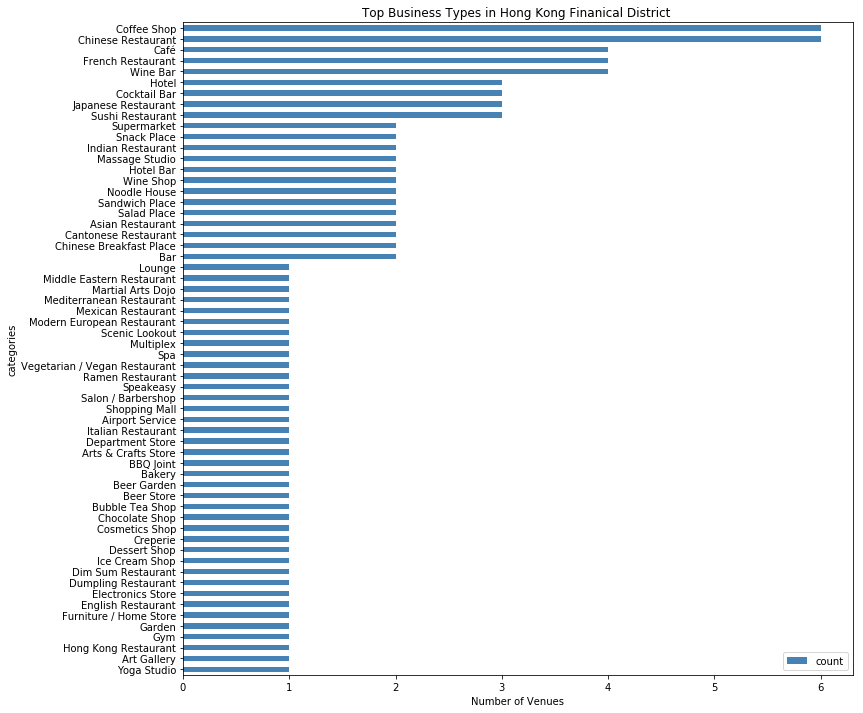

In [88]:
# generate plot for Hong Kong

HK_venues_count_sorted_reduced.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Venues')
plt.title('Top Business Types in Hong Kong Finanical District ')
plt.gca().invert_yaxis()

plt.show()

<h3>4.2 Results for Toronto</h3>

In [89]:
Toronto_venues_count = Toronto_nearby_venues.groupby(['categories']).size().to_frame(name='count')
Toronto_venues_count_sorted = Toronto_venues_count.sort_values('count',ascending=False).reset_index()
Toronto_venues_count_sorted

,categories,count
0,Coffee Shop,13
1,Café,8
2,Hotel,7
3,Restaurant,5
4,Bar,4
5,American Restaurant,3
6,Bakery,3
7,Seafood Restaurant,3
8,Deli / Bodega,3
9,Gastropub,3


In [90]:
Toronto_venues_count_sorted_reduced = Toronto_venues_count_sorted[['categories','count']].set_index('categories')
Toronto_venues_count_sorted_reduced.head()

,count
categories,
Coffee Shop,13
Café,8
Hotel,7
Restaurant,5
Bar,4


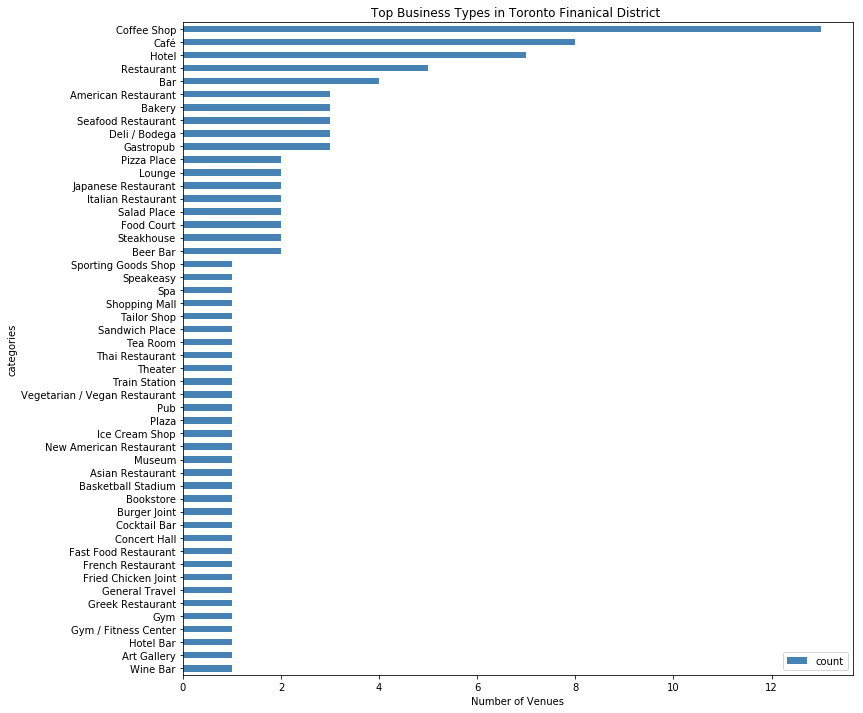

In [91]:
# generate plot for Toronto

Toronto_venues_count_sorted_reduced.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Venues')
plt.title('Top Business Types in Toronto Finanical District ')
plt.gca().invert_yaxis()

plt.show()

<h3>4.3 Results for New York</h3>

In [92]:
NY_venues_count = NY_nearby_venues.groupby(['categories']).size().to_frame(name='count')
NY_venues_count_sorted = NY_venues_count.sort_values('count',ascending=False).reset_index()
NY_venues_count_sorted

,categories,count
0,Coffee Shop,9
1,American Restaurant,7
2,Cocktail Bar,4
3,Pizza Place,3
4,Gym,3
5,Food Truck,3
6,Italian Restaurant,3
7,Falafel Restaurant,3
8,Juice Bar,3
9,Mediterranean Restaurant,3


In [93]:
NY_venues_count_sorted_reduced = NY_venues_count_sorted[['categories','count']].set_index('categories')
NY_venues_count_sorted_reduced.head()

,count
categories,
Coffee Shop,9
American Restaurant,7
Cocktail Bar,4
Pizza Place,3
Gym,3


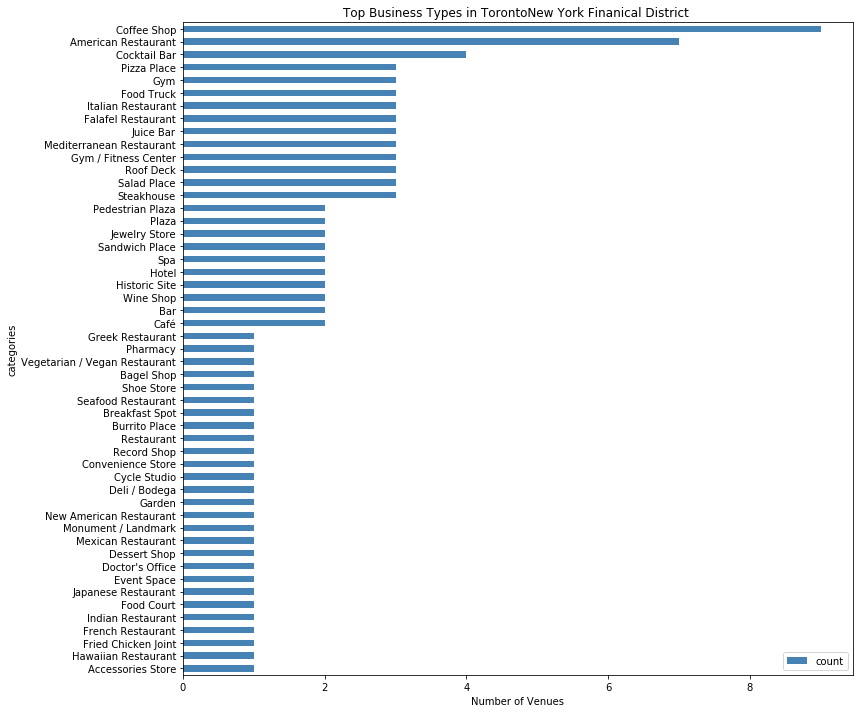

In [55]:
# generate plot for Toronto

NY_venues_count_sorted_reduced.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Venues')
plt.title('Top Business Types in TorontoNew York Finanical District ')
plt.gca().invert_yaxis()

plt.show()

<h2>5. Discussions</h2>
<p>As stated in the introduction, we are standing in the shoes of a Hong Kong entrepreneur to carry out a research on consumer businesses around major global financial centers and from there to decide on the type of business he should set up for highest chance of survivability and profitability, because the real estate cost is phenomenally high in Hong Kong.</p>
<p>One good reason for the HK entrepreneur to make cross reference to Toronto and New York is that traditionally, Hong Kong people are very keen in following the western culture, obviously including consumer behavior, leisure and other culture activities.</p>
<p>It is observed that there are only 6 coffee shops in Hong Kong while there are 13 in Toronto and 9 in New York. This could represent an opportunity for setting up a coffee shop in Hong Kong as the coffee shop market looks less mature and offers room for further development in Hong Kong, particularly around the financial district.</p>
<p>Another observation is that there are 3 gym&rsquo;s and 2 spa&rsquo;s in New York but none found in Hong Kong. This could represent an opportunity for the Hong Kong entrepreneur for setting up a gym/spa/fitness center as more people around the world are now more concern about their health and wellness like western people and this market in Hong Kong around the financial district still looks like a blue ocean to be developed.</p>
<p>It is also observed that there are large number and variety of restaurants within the financial center districts around all Hong Kong, Toronto and New York. Restaurants could still be an viable alternative for setting a new business but the Hong Kong entrepreneur should expect high competition in this market</p>

<h2>6. Conclusions</h2>
<p>Due to phenomenally high real estate cost around the financial center district, an entrepreneur must be very prudent when deciding what type of consumer business he/she should set up for better chance of survivability and profitability.</p>
<p>According to the traditional cultural influence of the Western World, a Hong Kong entrepreneur can make cross reference to the popularity of consumer businesses in the Western World &ndash; Toronto and New York in this study, which makes use of online data sources and direct analytics techniques.</p>
<p>From the study, it looks like that coffee shop and gym/spa/fitness center represent a good opportunity for the Hong Kong entrepreneur to pursue his/her endeavor.</p>